In [1]:
import re
import pandas as pd
import jieba
# 停用词设置，此处采用的是哈工大的停用词表
stop_words=[i.strip() for i in open("../data/stop_words/hit_stopwords.txt","r",encoding="utf-8").readlines()] # 获取停用词
text_s=""
data=pd.read_csv("./data.tsv",sep="\t")
a={}

for text in data['text_a']:
    cut_list=jieba.lcut("".join(re.findall("[\u4e00-\u9fa5a-zA-Z0-9]",text))) # 只取汉字、英文字母和数字，\u4e00-\u9fa5为unicode表中所有汉字
    for word in cut_list:
        if word not in stop_words:
            a[word]=a.get(word,0)+1
            text_s+=" "+word

FileNotFoundError: [Errno 2] No such file or directory: './data.tsv'

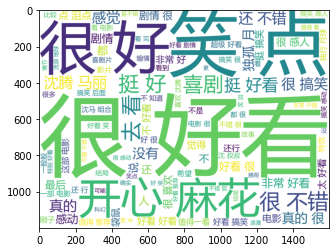

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(
        background_color = "white", #背景颜色
        # mask = cloud_mask,          #背景图cloud_mask
        max_words=100,              #最大词语数目
        font_path = 'msyh.ttc',   #调用font里的simsun.tff字体，需要提前安装
        height=1200,                #设置高度
        width=1600,                 #设置宽度
        max_font_size=1000,         #最大字体号
        random_state=1000,          #设置随机生成状态，即有多少种配色方案
        )
 
myword = wc.generate(text_s)  # 用 wl的词语 生成词云
# 展示词云图
plt.imshow(myword)
plt.axis("off")
plt.show()

In [16]:
# 创建词表
vacab=list(a.items())
vacab=sorted(vacab,key=lambda x:x[1],reverse=True) # 按照词频对词进行排序，词频大的在前
with open("./vacab.txt","w+",encoding="utf-8") as f:
    for word,_ in vacab:
        f.write(word+"\n")